In [2]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import layers

2024-07-26 18:23:21.067775: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-26 18:23:21.097971: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-26 18:23:21.545347: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
#Coletando dados

df = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Moluscos/RJ_Reconstrucao_Moluscos_2024_06_25.xlsx')
df_desagregar = pd.DataFrame(df[['Ano','Ostra_art','Mexilhao_art']])

dados = df_desagregar[['Ano','Ostra_art','Mexilhao_art']].dropna().reset_index(drop=True)

for i in range(len(dados['Ano'])):
  dados.loc[i,'Soma'] = dados.loc[i,'Ostra_art']+dados.loc[i,'Mexilhao_art']
  
dados = dados[['Ano','Mexilhao_art','Soma']]

#Fazendo as proporções
for i in range(len(dados['Ano'])):
  dados.loc[i,'Prop_Mexilhao_art'] = dados.loc[i,'Mexilhao_art'] / dados.loc[i,'Soma']


anos_com_dados = dados["Ano"].values
anos_para_prever = np.array([1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1965,1969,1970,1971,1972,1973,1974,1975,1976,1977])
todos_anos = np.concatenate((anos_para_prever, anos_com_dados))
todos_anos.sort()


prop = dados['Prop_Mexilhao_art'].values
dados.head()

,Ano,Mexilhao_art,Soma,Prop_Mexilhao_art
0,1962,2.0,5.0,0.400000
1,1963,70.0,75.0,0.933333
2,1964,600.0,617.0,0.972447
3,1966,32.0,45.0,0.711111
4,1984,23.0,42.0,0.547619


In [5]:
#Normalização dos dados

ano_mean = np.mean(anos_com_dados)
ano_std = np.std(anos_com_dados)
anos_para_prever_norm = (anos_para_prever - ano_mean)/ano_std
anos_com_dados_norm = (anos_com_dados - ano_mean)/ano_std

prop_mean = np.mean(prop)
prop_std = np.std(prop)
prop_norm = (prop - prop_mean)/prop_std

In [6]:
#Fit do modelo e salvando seus pesos
model = keras.Sequential([layers.Dense(96,activation='leaky_relu',input_shape=(1,)),
                             layers.Dense(32,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(96,activation='leaky_relu'),
                             layers.Dense(112,activation='leaky_relu'),
                             layers.Dense(1,activation='linear')])

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')


history = model.fit(anos_com_dados_norm,prop_norm, epochs=190, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Moluscos/Mexilhão/pesos prop Mexilhao_art/.weights.h5', overwrite=True)

Epoch 1/190


/home/andre/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 776ms/step - loss: 0.9955
Epoch 2/190
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9582
Epoch 3/190
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9240
Epoch 4/190
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.8876
Epoch 5/190
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.8479
Epoch 6/190
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.8039
Epoch 7/190
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.7576
Epoch 8/190
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7084
Epoch 9/190
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.6587
Epoch 10/190
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.6140
Epoch 11/190
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.5809
Epoch 12/190
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.5644
Epoch 13/190
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.5645
Epoch 14/190
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.5642
Epoch 15/190
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.5472
Epoch 16/190
1/1 ━━━━━━━━━━━━━

In [7]:
model.load_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Moluscos/Mexilhão/pesos prop Mexilhao_art/.weights.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Previsões dos dados ausentes: [[0.8579985 ]
 [0.8501449 ]
 [0.8423141 ]
 [0.8344828 ]
 [0.82665145]
 [0.81883955]
 [0.8110859 ]
 [0.80338144]
 [0.79567724]
 [0.78798985]
 [0.7803773 ]
 [0.77272934]
 [0.7423908 ]
 [0.7116329 ]
 [0.7037789 ]
 [0.695867  ]
 [0.68795514]
 [0.6800433 ]
 [0.6721296 ]
 [0.66411173]
 [0.6560789 ]
 [0.64803016]]


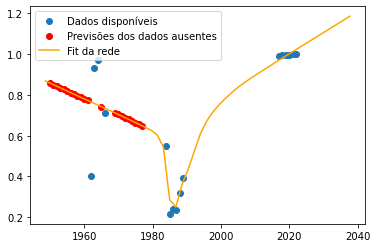

In [8]:
#Previsões
prev_disponiveis = model.predict(anos_com_dados_norm)*prop_std + prop_mean
prev_ausentes = model.predict(anos_para_prever_norm)*prop_std + prop_mean

#Colocando valores negativos para 0
for i in range(len(prev_ausentes)):
    if prev_ausentes[i]<0:
        prev_ausentes[i]=0
    if prev_ausentes[i]>=1:
        prev_ausentes[i]=1

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,prop,label='Dados disponíveis')
f1.scatter(anos_para_prever,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
y = model.predict(p)*prop_std + prop_mean
f1.plot(p*ano_std + ano_mean,y,color='orange',label='Fit da rede')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

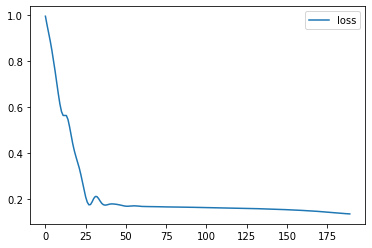

In [9]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()

In [14]:
#Lista todos_anos normalizada e sua predição      (para poder me referir por indices)

anos = np.arange(1950,np.max(anos_para_prever)+1)
anos_norm = (anos-ano_mean)/ano_std
prev_continua = model.predict(anos_norm)*prop_std + prop_mean

for i in range(len(prev_continua)):
    if prev_continua[i]<0:
        prev_continua[i]=0
    if prev_continua[i]>=1:
        prev_continua[i]=1


#Dataframe de valores de pesca baseando-se nas previsões das proporções de TOTAL_MOLLUSCS sem Lula e Polvo
TOTAL_MOLLUSCS_preenchido = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Moluscos/Polvos/TOTAL_MOLLUSCS_sem_lu_po.xlsx')

#Planilha com os dados preenchidos
df_preenchido = df[['Ano','Mexilhao_art']]
for i in range(len(anos)):
        df_preenchido.loc[i,'Mexilhao_art'] = TOTAL_MOLLUSCS_preenchido.loc[i,'TOTAL_MOLLUSCS']*prev_continua[i]


with pd.option_context('display.max_rows', None,):
    print(df_preenchido)

df_preenchido.to_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Moluscos/Mexilhão/Previsão Mexilhao_art_1950-1977.xlsx')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
     Ano  Mexilhao_art
0   1950      6.788969
1   1951      8.420219
2   1952     10.083335
3   1953     10.741232
4   1954     10.287647
5   1955      9.403084
6   1956     11.733393
7   1957     17.937698
8   1958     12.822560
9   1959      6.950756
10  1960     13.454052
11  1961     11.640804
12  1962     29.073402
13  1963    106.804100
14  1964    530.952271
15  1965    203.418076
16  1966     55.113678
17  1967    105.439125
18  1968    606.453918
19  1969     47.355495
20  1970    103.480133
21  1971     48.739925
22  1972     85.688004
23  1973    180.876648
24  1974    232.917557
25  1975     75.351959
26  1976     30.988342
27  1977     82.731911
28  1978           NaN
29  1979           NaN
30  1980           NaN
31  1981      5.000000
32  1982      9.000000
33  1983     53.000000
34  1984     23.000000
35  1985     21.000000
36  1986     35.000000
37  1987     44.000000
38  1988     42.000000
39  1989     44.000000
40  1990           